Open speech

In [1]:
with open('./texts/greta.txt', 'r') as file:
    speech = file.read()
print(len(speech))

5246


We obtain a string.
Let's take the \n from it

In [2]:
speech = speech.replace('\n', ' ')
# store tokens into a list
tokens = speech.split(' ')
len(tokens)

931

Take out punctuation

In [3]:
import string
print(string.punctuation)
# list of punctuation and somehow, needed to add '"' + '?'
punc = string.punctuation + '–' + '"' + '?'

for p in punc:
    speech_no_punct = speech.replace(p, ' ')
# problem = it cuts the digits. Do I need it ??
# for word in speech_no_punct:
#     if word.isdigit():
#         speech_no_punct.replace(word, ' ')

tokens = speech_no_punct.split(' ')
        
filtered_tokens = list(filter(lambda x: x != '', tokens))

print(len(filtered_tokens))


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
931


Equilize letters 

In [4]:
uniformed_tokens = [ x.lower() for x in filtered_tokens]

Take care of stop words

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# decided to keep the pronouns to analyse the speech
stop_words = [x for x in stopwords.words('english') if x not in ['we', 'you', 'i', 'our', 'your']]

speech_without_sw=[x for x in uniformed_tokens if x not in stop_words]
# for word in uniformed_words:
#     if word not in stop_words:
#         speech_without_sw.append(word)

len(speech_without_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laetitiataddei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


485

Words frequency

In [6]:
def speech_freq(list):
    _dict = {}
    for el in list:
        if _dict.get(el):
            _dict[el] += 1
        else:
            _dict[el] = 1
    return _dict

tokens_frequencies = speech_freq(speech_without_sw)

Get  the first 10 most frequent words

In [7]:
couples = tokens_frequencies.items()
ordered_tokens = sorted(couples, reverse=True, key=lambda item: item[1])

top25 = ordered_tokens[:25]
top25_dict = dict(top25)
top25_dict

{'we': 21,
 'people': 11,
 'our': 11,
 'power': 6,
 'continue': 6,
 'ignore': 6,
 'cannot': 5,
 'leaders': 5,
 'climate': 5,
 'us': 4,
 'know': 4,
 'like': 4,
 'need': 4,
 'fighting': 4,
 'crisis': 3,
 'take': 3,
 'living': 3,
 'still': 3,
 'emissions': 3,
 'world': 3,
 'crises': 3,
 'it.': 3,
 'say': 3,
 'new': 3,
 'radical.': 3}

Graph the results

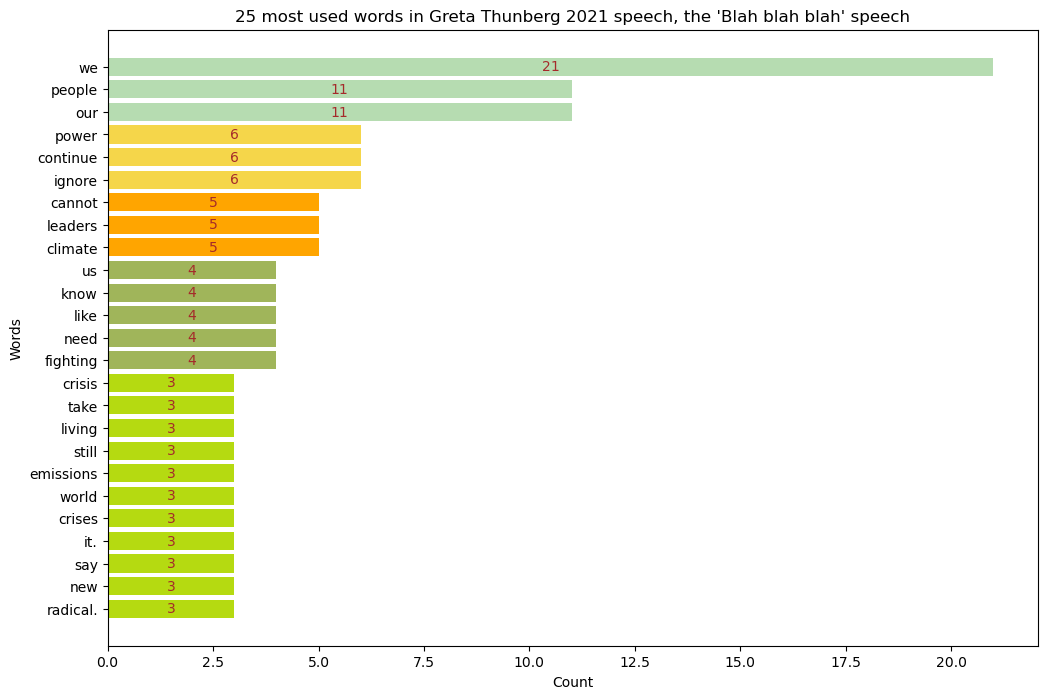

In [8]:
import matplotlib.pyplot as plt
vert_pale = '#b6dcb1'
vert_anis = '#b5da11'
green = '#a0b55a'
yellow = '#f5d64a'


colors = [vert_pale if i > 6 else yellow if i == 6 else 'orange' if i == 5 else green if i == 4 else vert_anis for i in top25_dict.values()]
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('25 most used words in Greta Thunberg 2021 speech, the \'Blah blah blah\' speech')
bars = ax.barh(list(top25_dict.keys()), list(top25_dict.values()), color=colors)
ax.invert_yaxis()
ax.set_ylabel('Words')
ax.set_xlabel('Count')
ax.bar_label(bars, label_type='center', color='brown')

plt.show()

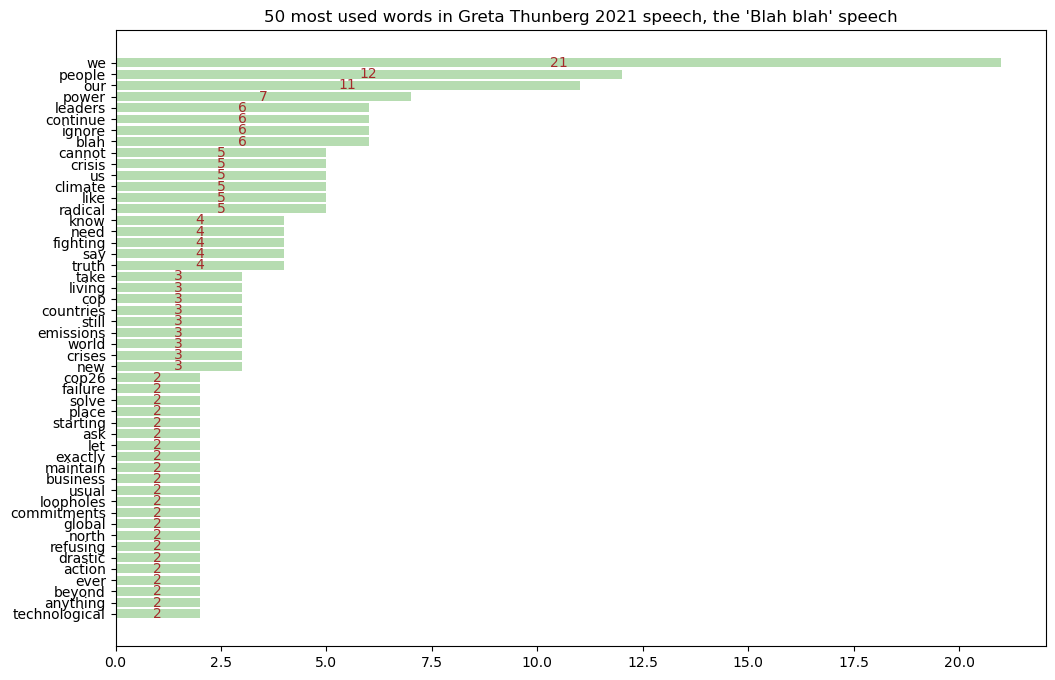

In [10]:
top50 = ordered_tokens[:50]
top50_dict = dict(top50)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('50 most used words in Greta Thunberg 2021 speech, the \'Blah blah\' speech')
bars = ax.barh(list(top50_dict.keys()), list(top50_dict.values()), color=vert_pale)
ax.invert_yaxis()
ax.bar_label(bars, label_type='center', color='brown')

plt.show()

Word cloud

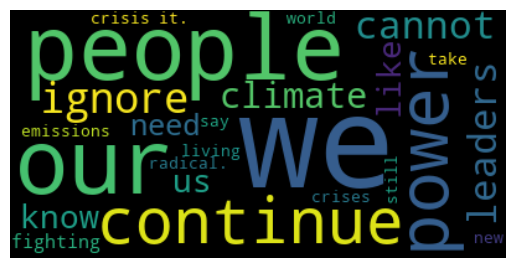

<Figure size 640x480 with 0 Axes>

In [15]:
import os
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

# make a text out of our result
cloud_text = (' ').join([x for x in top25_dict])



# generate_from_frequencies pour dictionnaire
wordcloud = WordCloud().generate_from_frequencies(top25_dict)

# store to file
# wordcloud.to_file("./blah.png")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.figure()

plt.show()

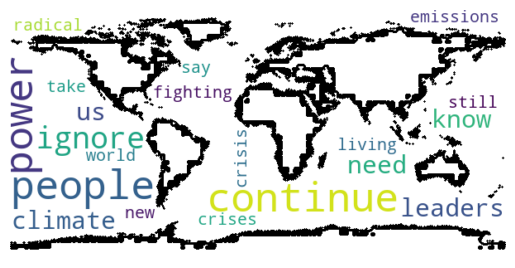

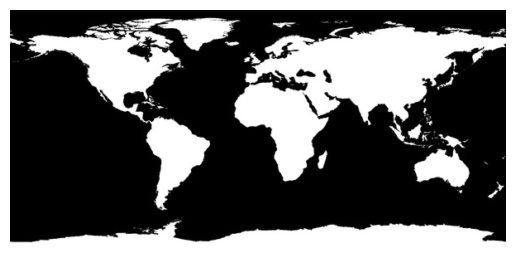

In [16]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
map_mask = np.array(Image.open("./masks/map_mask.jpg"))

wc = WordCloud(background_color="white", max_words=2000, mask=map_mask, contour_width=3, contour_color='black')

# generate word cloud
wc.generate(cloud_text)

# store to file
# wc.to_file("./map.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(map_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

Successful


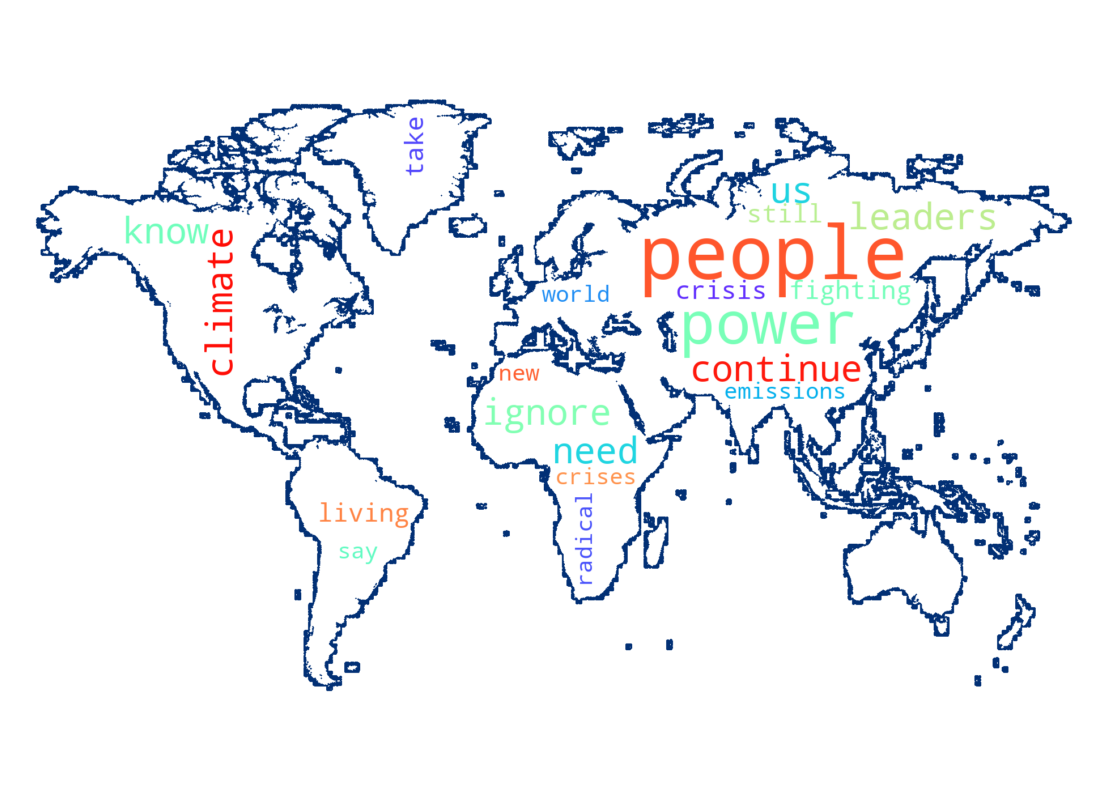

In [20]:
def convertImage():
    img = Image.open("./masks/world_mask.jpg")
    img = img.convert("RGBA")
    
    datas = img.getdata()
    newData = []

    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    
    img.putdata(newData)
    # img.save("./New.png", "PNG")
    print("Successful")
convertImage()

mask = np.array(Image.open("./masks/world_mask.jpg"))

wc = WordCloud(background_color="white", mask=mask,
    max_font_size=190, random_state=0,contour_color='#023075',contour_width=2,colormap='rainbow')

wc.generate(cloud_text)
# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
import pandas as pd
import plotly.express as px
 
figure = px.bar(y=top25_dict.keys(), x=top25_dict.values())

figure.show()

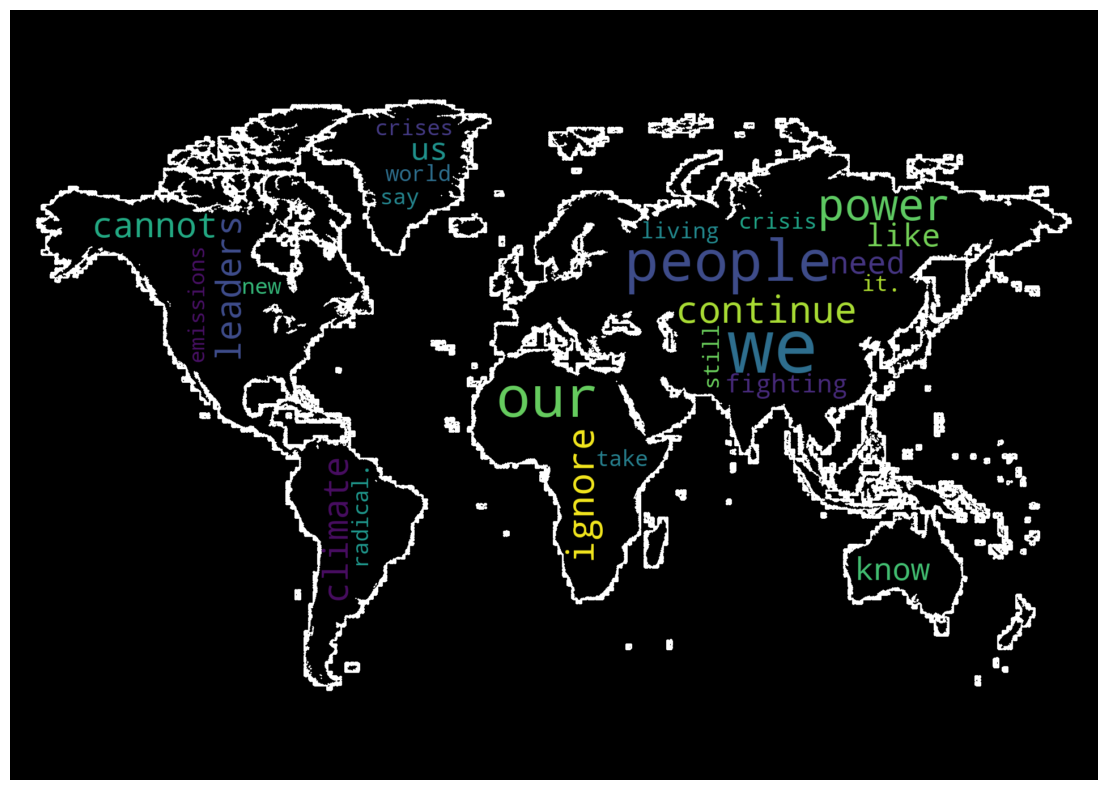

In [22]:
map_mask2 = np.array(Image.open('./masks/world_mask.jpg'))

#  def transform_format(val):
#         if val == 20:
#             return 255
#         else:
#             return val

# Create a word cloud image
wc = WordCloud(background_color="black", max_words=1000, mask=map_mask2,
    contour_width=3, contour_color='white')

# Generate a wordcloud
wc.generate_from_frequencies(top25_dict)

# store to file
# wc.to_file("blah_map.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

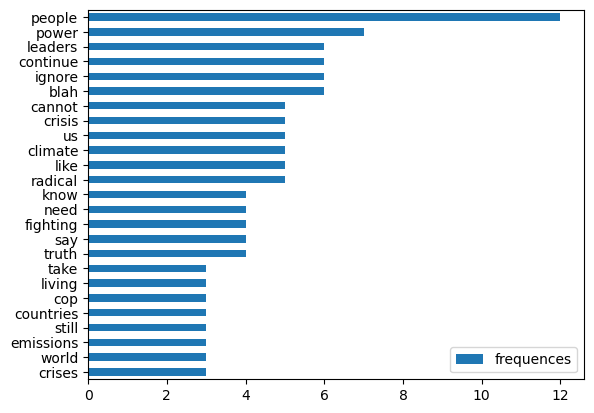

In [ ]:
df = pd.DataFrame({'words': top25_dict.keys(), 'frequences': top25_dict.values()}, index=top25_dict.keys())
df.plot(kind='barh')
plt.gca().invert_yaxis()